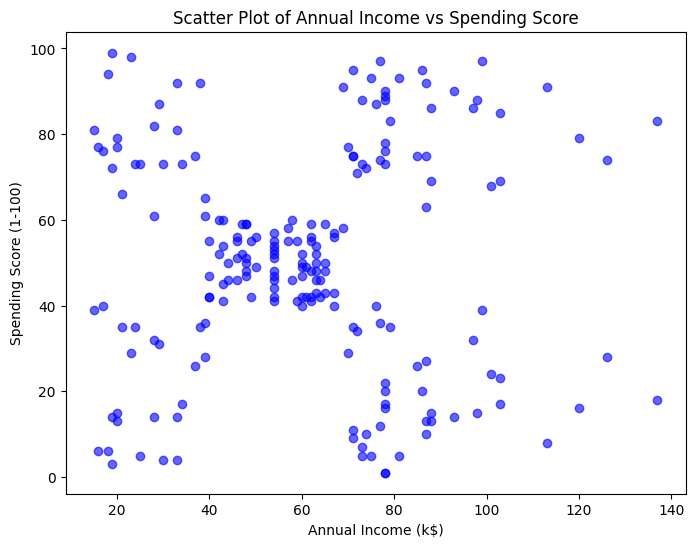

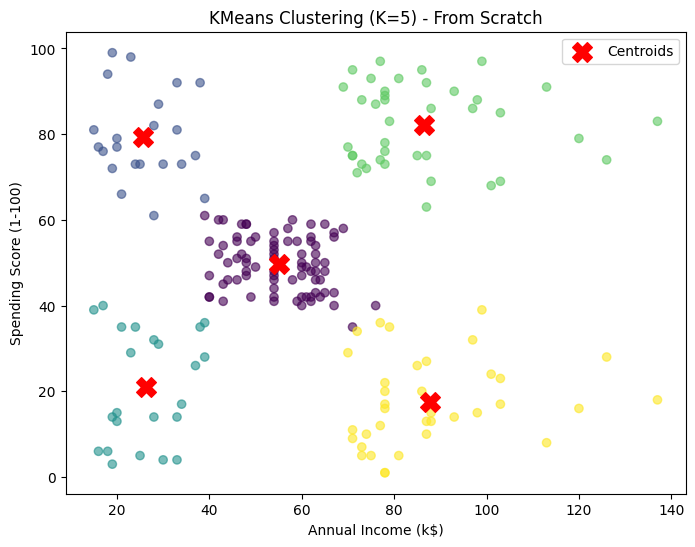

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], 
            c="blue", alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Annual Income vs Spending Score")
plt.show()

X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Parameters
K = 5
np.random.seed(42)

centroids = X[np.random.choice(X.shape[0], K, replace=False)]
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, K):
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])

# Run until convergence
for _ in range(100):  # max 100 iterations
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, labels, K)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Plot final clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], 
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clustering (K=5) - From Scratch")
plt.legend()
plt.show()